In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

# Help

Работа с утилитой DFISETOOLS.

Получить распределения физических величин в заданном сечении устройства можно с помощью утилиты DFISETOOLS. Утилита DFISETOOLS вызывается следую-щей командой

$ dfisetools –plot  sharp_msh.grd  sharp_des.dat 

	Здесь входящие файлы sharp_msh.grd, sharp_des.dat являются DF-ISE файлами, или другими словами текстовыми файлами, которые можно редактировать любым тек-стовым редактором. Таким образом, утилита DFISETOOLS работает с DF-ISE файлами.
  
	В прежних версиях Sentaurus TCAD, при моделировании устройств, всегда созда-вались sharp_msh.grd, sharp_des.dat файлы, которые являются DF-ISE файлы.

В настоящей версии Sentaurus TCAD, в версии G-2012.06, вместо текстовых DF-ISE файлов sharp_msh.grd, sharp_des.dat создаются бинарные TDR файлы sharp_msh.tdr, sharp_des.tdr. С этими файлами утилита DFISETOOLS работать не может.

Однако, как отмечалось выше, TDR - файлы  можно конвертировать в DF-ISE фай-лы с помощью tdx утилиты.

	Находясь в каталоге /Sharp, наберем в командной строке следующую команду.
$ tdx –dd –M 0 –S 0 sharp_msh.tdr sharp_msh 

	В результате в каталоге /Sharp, появляется файл sharp_msh.grd в текстовом формате.
	Наберем в командной строке следующую команду.
$ tdx –dd –M 0 –S 0 sharp_des.tdr sharp_des 

	В результате в каталоге /Sharp, появляется файл sharp_des.dat в текстовом формате.

Итак, в каталоге /Sharp, появились файлы sharp_msh.grd и sharp_des.dat.

Теперь запускаем утилиту DFISETOOLS командой

$ dfisetools –plot  sharp_msh.grd  sharp_des.dat

Появляется приглашение ввести координаты (x,y) начальной и конечной точки линии разреза.

1st point of line?
     x =  0.0
     y = -1.0
2nd point of line?
     x = -1.5
     y =  1.0

В результате в папке …\Sharp появляется файл sharp_des_plt.plt. 


# 2d structure version 1

There is no light in this structure

In [5]:
FILENAMES = ['v3_ivcurve.csv', 'v4_ivcurve.csv', 'v5_ivcurve.csv']
INTENSITY = [['1000', '100', '10', 'DCR'], ['DCR'], ['DCR'] ]
STRUCTURE_NAMES = [r'$25 \ \mu m$', r'$15 \ \mu m$', r'$10 \ \mu m$']

input_dict = {}
for file_name in FILENAMES:
    input_dict[file_name] = {}
    plot_cnt = 0
    plot_type = 'none'
    
    with open (file_name) as file:
        for line in file:
            line_red = line.strip().split(',')
            if line_red == ['"x', '""y"""'] or line_red == ['"x"', '"y"']:
                plot_type = INTENSITY[FILENAMES.index(file_name)][plot_cnt]
                input_dict[file_name][plot_type] = []
                input_dict[file_name][plot_type].append(['x', 'y'])
                plot_cnt += 1
            elif line_red != ['']:
                input_dict[file_name][plot_type].append([float(el) for el in line_red])

Compare the I-V curves for DCR for different SPAD structures

In [6]:
plot_type = 'DCR'
x_field_dict = {}
y_field_dict = {}

for file_name in FILENAMES:
    x_field_dict[file_name] = []
    y_field_dict[file_name] = []
    xy_list = input_dict[file_name][plot_type]
    
    for el in xy_list:
        if type(el[0]) == float:
            x_field_dict[file_name].append(el[0])
            y_field_dict[file_name].append(el[1])

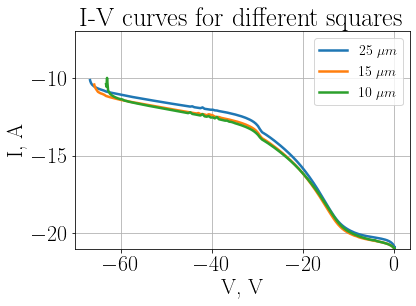

In [13]:
for i in range(len(FILENAMES)):
    file_name = FILENAMES[i]
    wdth = 2.5
    plt.plot(x_field_dict[file_name], np.log10(- np.array(y_field_dict[file_name])), label = STRUCTURE_NAMES[i], linewidth = wdth)

plt.grid(True)
plt.xlabel('V, V')
plt.ylabel('I, A')
plt.title('I-V curves for different squares')
plt.legend(fontsize=14, loc='upper right')
plt.ylim([-21, -7])
#plt.savefig('ivcurves_square_dcr.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

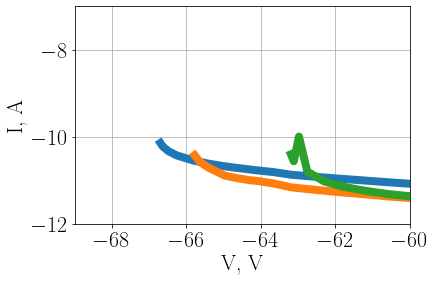

In [14]:
for i in range(len(FILENAMES)):
    file_name = FILENAMES[i]
    wdth = 8
    plt.plot(x_field_dict[file_name], np.log10(- np.array(y_field_dict[file_name])), label = STRUCTURE_NAMES[i], linewidth = wdth)

plt.grid(True)
plt.xlabel('V, V')
plt.ylabel('I, A')
#plt.title('I-V curves for different structures')
#plt.legend(fontsize=14, loc='upper right')
plt.ylim([-12, -7])
plt.xlim([-69, -60])
#plt.savefig('ivcurves_square_dcr_zoom.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

Compare I-V curves for v3 structure

In [72]:
file_name = FILENAMES[2]
x_field_dict = {}
y_field_dict = {}

for intens in INTENSITY[2]:
    x_field_dict[intens] = []
    y_field_dict[intens] = []
    xy_list = input_dict[file_name][intens]
    
    for el in xy_list:
        if type(el[0]) == float:
            x_field_dict[intens].append(el[0])
            y_field_dict[intens].append(el[1])

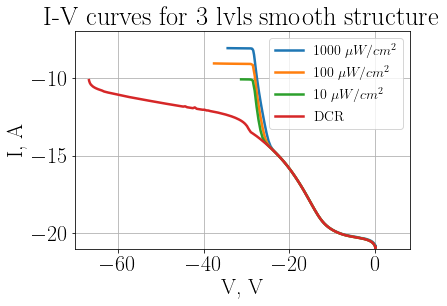

In [78]:
file_name = FILENAMES[2]
wdth = 2.5
for i in range(len(INTENSITY[2])):
    intens = INTENSITY[2][i]
    if intens != 'DCR':
        plt.plot(x_field_dict[intens], np.log10(- np.array(y_field_dict[intens])), label = intens + r' $\mu W / cm^2$', linewidth = wdth)
    else:
        plt.plot(x_field_dict[intens], np.log10(- np.array(y_field_dict[intens])), label = str(intens), linewidth = wdth)

plt.grid(True)
plt.xlabel('V, V')
plt.ylabel('I, A')
plt.title('I-V curves for 3 lvls smooth structure')
plt.legend(fontsize=14, loc='upper right')
plt.ylim([-21, -7])
plt.xlim([-70, 8])
plt.savefig('ivcurves_v3struct.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()